#0. Preprocess + EDA + Feature Selection
#1. Extract input and output cols
#2. Scale the values
#3. Train test split
#4. Train the model
#5. Evaluate the model/model selection
# 6. Deploy the model

In [ ]:
import numpy as np
import pandas as pd


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Dataset/End_To_End_Project_Dataset/modified_placement_data.csv')

In [ ]:
df.head()

,cgpa,iq,placement
0,"6,8",123.0,Yes
1,"5,9",106.0,No
2,"5,3",121.0,No
3,"7,4",132.0,Yes
4,"5,8",142.0,No


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   cgpa       95 non-null     object 
 1   iq         100 non-null    float64
 2   placement  100 non-null    object 
dtypes: float64(1), object(2)
memory usage: 2.5+ KB


In [ ]:
from sklearn.impute import SimpleImputer
sm = SimpleImputer(strategy='most_frequent')
df['cgpa']=sm.fit_transform(df[['cgpa']]).ravel()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   cgpa       100 non-null    object 
 1   iq         100 non-null    float64
 2   placement  100 non-null    object 
dtypes: float64(1), object(2)
memory usage: 2.5+ KB


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
df['cgpa']=df['cgpa'].str.replace(',','.').astype(float)

In [ ]:
df

,cgpa,iq,placement
0,6.8,123.0,Yes
1,5.9,106.0,No
2,5.3,121.0,No
3,7.4,132.0,Yes
4,5.8,142.0,No
...,...,...,...
95,4.3,200.0,No
96,4.4,42.0,No
97,6.7,182.0,Yes
98,6.3,103.0,Yes


In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['placement']=le.fit_transform(df['placement'])

In [ ]:
df

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0
...,...,...,...
95,4.3,200.0,0
96,4.4,42.0,0
97,6.7,182.0,1
98,6.3,103.0,1


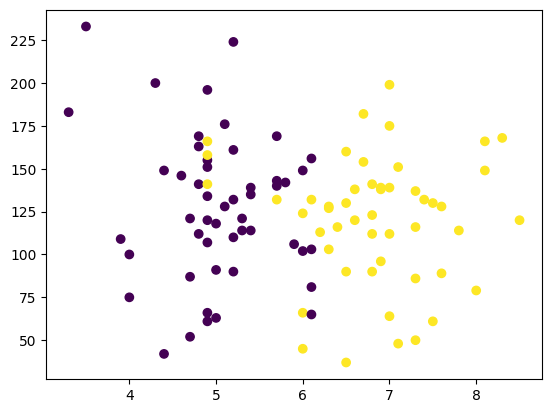

In [ ]:
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df.drop(columns='placement'),df['placement'],test_size=0.31,random_state=42)


In [ ]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x_train=ss.fit_transform(x_train)
x_test=ss.transform(x_test)

In [ ]:
x_test

array([[ 1.57121047,  0.09659673],
       [ 2.3401007 ,  1.08595856],
       [ 0.41787513,  0.01848922],
       [ 0.12954129, -1.56969688],
       [ 1.57121047, -1.69987607],
       [-1.21601661,  0.51317013],
       [-0.92768278, -0.16376165],
       [-0.92768278,  1.81496202],
       [ 0.12954129, -2.11644947],
       [ 0.89843152, -0.08565413],
       [-1.79268429, -0.6844784 ],
       [ 1.66732175,  0.04452506],
       [-0.92768278, -1.69987607],
       [ 0.12954129,  0.59127765],
       [ 1.37898791, -1.04898013],
       [-0.06268127,  0.40902678],
       [-0.92768278,  0.74749267],
       [ 1.37898791, -1.98627028],
       [-0.44712638,  0.33091927],
       [-1.88879557, -0.45015586],
       [ 1.85954431, -0.31997667],
       [-1.40823917,  0.59127765],
       [ 1.09065408,  1.89306953],
       [ 1.66732175, -0.97087261],
       [ 2.53232326, -0.16376165],
       [-0.73546022,  1.29424526],
       [-0.92768278,  0.20074008],
       [-1.40823917, -2.19455699],
       [-0.92768278,

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [ ]:
lr.fit(x_train,y_train)

LogisticRegression()

In [ ]:
y_pred=lr.predict(x_test)
y_pred

array([1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1])

In [ ]:
y_test

,placement
83,1
53,1
70,1
45,1
44,1
39,0
22,0
80,0
10,1
0,1


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9032258064516129

In [ ]:
from mlxtend.plotting import plot_decision_regions

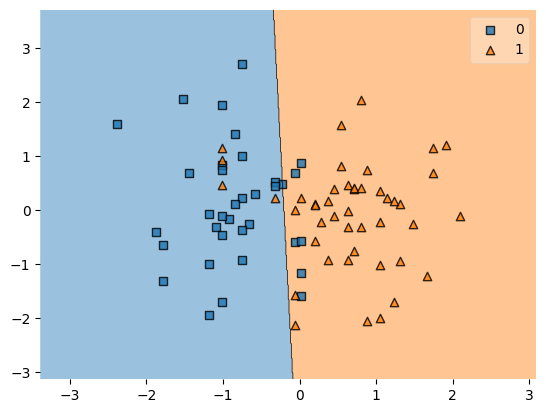

In [ ]:
plot_decision_regions(x_train,y_train.values,clf=lr)
plt.show()